<img src="https://gitlab.com/bivl2ab/academico/cursos-uis/ai/ai-uis-student/raw/master/imgs/banner_IA.png"  width="1000px" height="200px">

# Taller 7: Simmulated Annealing: Knapsack Problem

## <span style="color:red"> Outline </span> 

1. [Ejercicio 1. KS_neighbour](#eje1)
2. [Ejercicio 2. KS_simulated_annealing](#eje2)




#### <font style="color: red"> Esta práctica contiene 5 ejercicios <!-- ONLY IN NOTEBOOK -->



In [242]:
#@title 1. MONTAR EL DRIVE **student** { display-mode: "form" }
import os
from google.colab import drive
drive.mount('/content/drive')
os.chdir('/content/drive/My Drive/course-IA1/ai-uis-student/talleres20201')
#os.chdir('/content/drive/My Drive/ai-uis-student/talleres20201')
print(os.getcwd())
!chmod 777 convert_ipynb.sh run utils/*

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content/drive/My Drive/course-IA1/ai-uis-student/talleres20201


### Resolviendo NUEVAMENTE el problema de la mochila utilizando algoritmos geneticos

<img src='https://gitlab.com/bivl2ab/academico/cursos-uis/ai/ai-uis-student/raw/master/imgs/ks.jpg' style="width:700px;">

Tenemos $n$ objectos numerados del $0$ a $n-1$, con un tamaño $s_i$ y valor $v_i$ cada uno. Una solución cualquiera del problema es el vector $X=[x_0, x_2, ..., x_i, ... x_{n-1}]$, en donde $x_i \in \{0,1\}$ indica si el objecto $i$ se incluye o no la mochila. Como la mochila tiene un volumen máximo, $KS_{vol}$ el problema se formula de la siguiente manera:

$$ maximize \; X \;\; \sum_{i=0}^{n-1} x_i v_i$$

$$subject \; to \;\; \sum_{i=0}^{n-1} x_i s_i \le KS_{vol}$$

El vector $S=[s_0, s_2, ..., s_i, ... s_{n-1}]$ representa los tamaños de todos los objectos y el vector $V=[v_0, v_2, ..., v_i, ... v_{n-1}]$, los valores.

Fíjate a continuación cómo:

- generamos vectores $S$ y $V$ aleatorios
- generamos soluciones aleatorias
- verificamos si las soluciones generadas son válidas

### Ejercicio 1: Completa la función `KS_neighbour` para que genere una nueva solución válida <a name="eje1"></a>

La nueva solución ha de diferir como mucho en un bit. Puedes utilizar la función `KS_isvalid`.

In [495]:
def KS_isvalid(solution, object_volumes, KS_volume):
  import numpy as np
  return np.sum(solution*object_volumes)<=KS_volume

def KS_neighbour(solution, object_volumes, KS_volume):
  import numpy as np
  mutated_solution = np.copy(solution)
  band=0
  new_solution=None
  opc=list(range(0,len(object_volumes)))
  while band==0:
      new_solution=mutated_solution
      if len(opc)==0:
        band=1
      else:  
        i1 = np.random.randint(len(opc))
        if new_solution[opc[i1]]==0:
          new_solution[opc[i1]]=1
        else:
          new_solution[opc[i1]]=0
        opc.remove(opc[i1])
        if np.sum(new_solution*object_volumes)<=KS_volume:
          band=1  
  return new_solution

#Colaboratory
import urllib.parse, inspect
src1 = urllib.parse.quote_plus(inspect.getsource(KS_neighbour))

#Virtualbox
#import urllib, inspect
#src1 = urllib.quote_plus(inspect.getsource(KS_neighbour))

#### <span style="color:#FFF; background-color:#080; font-weight:bold; padding:4px;">Importante</span>
Evalue su respuesta

In [496]:
!./run CHECK_SOLUTION PS7_1 $src1

evaluation result CORRECT


### Ejercicio 2: Completa la función `KS_simulated_annealing` para que llame a la función `run_sa` según se ilustra en las notas con los parámetros del problema KS <a name="eje2"></a>

Completa las funciones de coste e inicialización de la población con tus soluciones del ejercicio anterior.

In [500]:
####REESCRIBIENDO LA FUNCION ../code/sa.py para cambiar parametros
%%writefile ../code/sa.py
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm_notebook as tqdm

def plot_evolution(bests, means, stds):
    plt.plot(means, label="means")
    plt.plot(bests, label="bests")
    plt.fill_between(range(len(means)), means-stds, means+stds, color="yellow", alpha=0.2)
    plt.legend()

def run_sa(n_individuals, n_cooling_steps, object_volumes, object_values, KS_volume,KS_initialize_population, KS_cost, KS_neighbour):
        
    pop = KS_initialize_population(n_individuals,object_volumes, KS_volume)
    mean_costs = []
    std_costs  = []
    best_costs = []
    best_sols  = []

    min_cost =np.inf
    min_sol  = None

    for T in tqdm(np.linspace(1,0,n_cooling_steps)):
        costs = []
        for i in range(len(pop)):
            sol = pop[i]
            cost_sol = KS_cost(sol,object_values, object_volumes, KS_volume) 

            # generate a neighbour
            nbr = KS_neighbour(sol,object_volumes, KS_volume)
            cost_nbr = KS_cost(nbr,object_values, object_volumes, KS_volume)

            # if the neighbour is better
            if cost_nbr < cost_sol and np.sum(nbr*object_volumes)<=KS_volume:
                sol = nbr
                cost_sol = cost_nbr

            pop[i] = sol
            costs.append(cost_sol)

            if cost_sol < min_cost and np.sum(sol*object_volumes)<=KS_volume:
                min_sol  = np.copy(pop[i])
                min_cost = KS_cost(pop[i],object_values, object_volumes, KS_volume)

        best_costs.append(np.min(costs))
        mean_costs.append(np.mean(costs))
        std_costs.append(np.std(costs))

    mean_costs = np.array(mean_costs)
    std_costs  = np.array(std_costs)
    best_costs = np.array(best_costs)
    
    return min_sol, best_costs, mean_costs, std_costs

Overwriting ../code/sa.py


In [501]:
%run ../code/sa.py

def KS_isvalid(solution, object_volumes, KS_volume):
  import numpy as np
  return np.sum(solution*object_volumes)<=KS_volume

def KS_initialize_population(n_individuals, object_volumes, KS_volume):
  import numpy as np
  r = []
  for i in range(n_individuals):
      band=0
      while band==0:
        indice=np.random.randint(1,len(object_volumes))+1
        var = np.random.randint(1,(1<<indice)-1)
        solucion=list(map(int,list(bin(var)[2:])))
        if len(object_volumes)>len(solucion):
          dif=np.zeros(len(object_volumes)-len(solucion))
          solucion.extend(list(dif))
        if len(solucion)>len(object_volumes):
          solucion.pop()
        solution = np.array(solucion) 
        if np.sum(solution*object_volumes)<=KS_volume:
          r.append(list(solution))
          band=1

  return np.array(r)    


def KS_cost(solution, object_values, object_volumes, KS_volume):
  #return  np.sum(solution*object_values)

  max_value=np.sum(object_values)
  if np.sum(solution*object_volumes)<=KS_volume:
    return max_value - np.sum(solution*object_values)
  return  np.sum(solution*object_values)


def KS_simulated_annealing(n_individuals, n_cooling_steps, object_volumes, object_values, KS_volume,KS_initialize_population, KS_cost, KS_neighbour):
  bestsol, bests, means, stds = run_sa(n_individuals, n_cooling_steps, object_volumes, object_values, KS_volume,KS_initialize_population, KS_cost, KS_neighbour)
  return  bests

import urllib.parse, inspect
src2 = urllib.parse.quote_plus(inspect.getsource(KS_initialize_population)+"\n"+
                         inspect.getsource(KS_cost)+"\n"+
                         inspect.getsource(KS_simulated_annealing)+"\n"+
                         inspect.getsource(KS_neighbour))



comprueba tu código. Con los parámetros especificados, la media de los costes de las soluciones debería de estar entre 1600 y 1900

In [502]:
%run ../code/sa.py
import numpy as np

n_individuals     = 50
n_cooling_steps   = 50
n_objects         = 50
KS_volume         = 100
mutation_prob     = 0.1
crossover_prob    = 0.5

object_values  = np.array([36, 20, 47, 53, 55, 46, 48, 66,  1,  6, 13, 59, 95,  7, 54, 32, 76, 63, 76, 19,  2, 17, 16, 12, 78,
 67, 44, 20, 41, 26, 24, 68, 55, 53, 35, 49, 46, 46, 16, 64, 41, 27,  8, 30, 76, 92, 85, 81, 84, 98])
object_volumes = np.array([ 8, 47, 16,  8, 41, 11, 45, 34, 26, 48, 16,  8, 10, 13, 28,  6,  7, 11,  8, 27, 44, 30, 25, 23, 45,
  3, 12, 12, 23,  3, 37, 10, 47, 46, 27, 10, 30,  8,  2, 47,  4, 44, 43, 37, 22, 20,  1, 17, 42, 27])

bss=KS_simulated_annealing(n_individuals, n_cooling_steps, object_volumes, object_values, KS_volume,KS_initialize_population, KS_cost, KS_neighbour)

print( np.mean(bss))


1703.06


#### <span style="color:#FFF; background-color:#080; font-weight:bold; padding:4px;">Importante</span> Evalue su respuesta.

In [503]:
!./run CHECK_SOLUTION PS7_2 $src2

--45

evaluation result CORRECT


## ya está!! ahora puedes experimentar con distintas configuraciones


best knapsack cost 1421.0


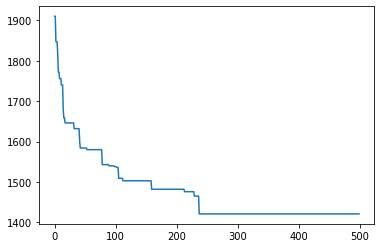

In [504]:
%run ../code/sa.py
import matplotlib.pyplot as plt
%matplotlib inline

n_individuals = 100
n_cooling_steps = 500


bests = KS_simulated_annealing(n_individuals, n_cooling_steps, object_volumes, object_values, KS_volume,
                            KS_initialize_population, KS_cost, KS_neighbour)

print( "best knapsack cost", np.min(bests))
plt.plot(bests)


best knapsack cost 1695.0


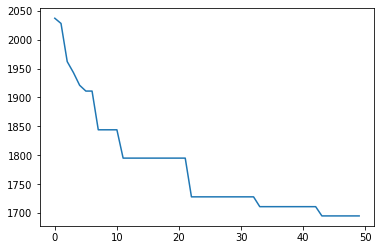

In [486]:
%run ../code/sa.py
import matplotlib.pyplot as plt
%matplotlib inline

n_individuals = 10
n_cooling_steps = 50

bests = KS_simulated_annealing(n_individuals, n_cooling_steps, object_volumes, object_values, KS_volume,
                            KS_initialize_population, KS_cost, KS_neighbour)

print( "best knapsack cost", np.min(bests))
plt.plot(bests)

#### <span style="color:#FFF; background-color:#080; font-weight:bold; padding:4px;">Importante</span> Pasos Finales. 



#### 1. Reemplace la variable con su código de estudiante

In [ ]:
#Colaboratory
import urllib.parse, inspect
taller = urllib.parse.quote_plus("Taller_07_20201_Simulated_Annealing")
codigo = urllib.parse.quote_plus("tl7_12345")

#Virtualbox
#import urllib, inspect
#taller = urllib.quote_plus("Taller_07_20201_Simulated_Annealing")
#codigo = urllib.quote_plus("tl7_12345")

print(taller, codigo)

Taller_07_20192_Simulated_Annealing tl7_12345


#### 2. Guarde los cambios del taller:

In [ ]:
%%javascript
require(["base/js/namespace"],function(Jupyter) {
    Jupyter.notebook.save_checkpoint();
});

<IPython.core.display.Javascript object>

#### 3. Ejecute la siguiente celda y envíe el archivo comprimido

In [ ]:
!./convert_ipynb.sh $codigo $taller

uno: tl7_12345 dos Taller_07_20192_Simulated_Annealing
¡PERFECTO!, el archivo   'tl7_12345.ipynb'   se creó correctamente :D


---
<img src="https://gitlab.com/bivl2ab/academico/cursos-uis/ai/ai-uis-student/raw/master/imgs/bannerThanks.jpg" alt="Drawing" style="width:700px;"/>